# Explore here

Sistema de clasificación de imágenes: Gatos y Perros


In [4]:
# Your code here
# Import Packages
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

In [6]:
data_dir = "../data/raw"
contents = os.listdir(data_dir)
print(contents)


['.gitkeep', 'Cat', 'train', 'Dog', 'test']


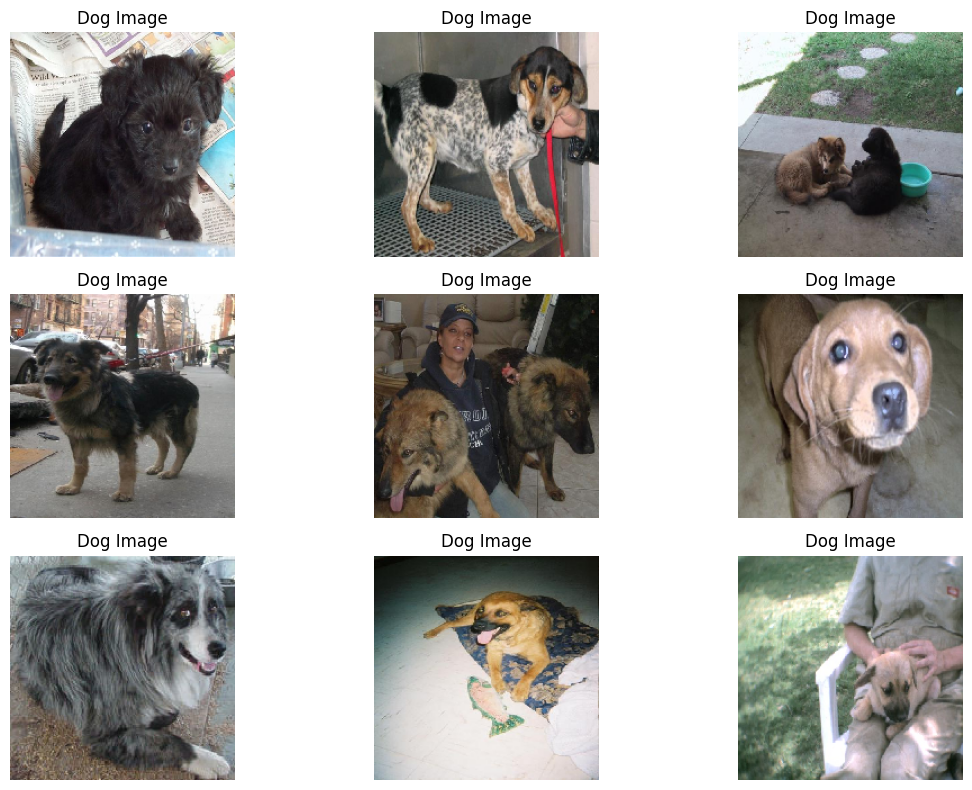

In [7]:
# Get a list of all dog image file names
dog_subfolder = os.path.join(data_dir, "Dog")
dog_image_files = os.listdir(dog_subfolder)

# Load the first nine dog images
dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path, target_size=(200, 200)) # Adjust target_size as needed
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    dog_images.append(img_array)

# Create a single figure to display all nine images
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()

In [9]:
num_dog_images = len(os.listdir(dog_subfolder))

# Imprimir el resultado
print(f"La subcarpeta 'dog' contiene {num_dog_images} imágenes.")

La subcarpeta 'dog' contiene 12470 imágenes.


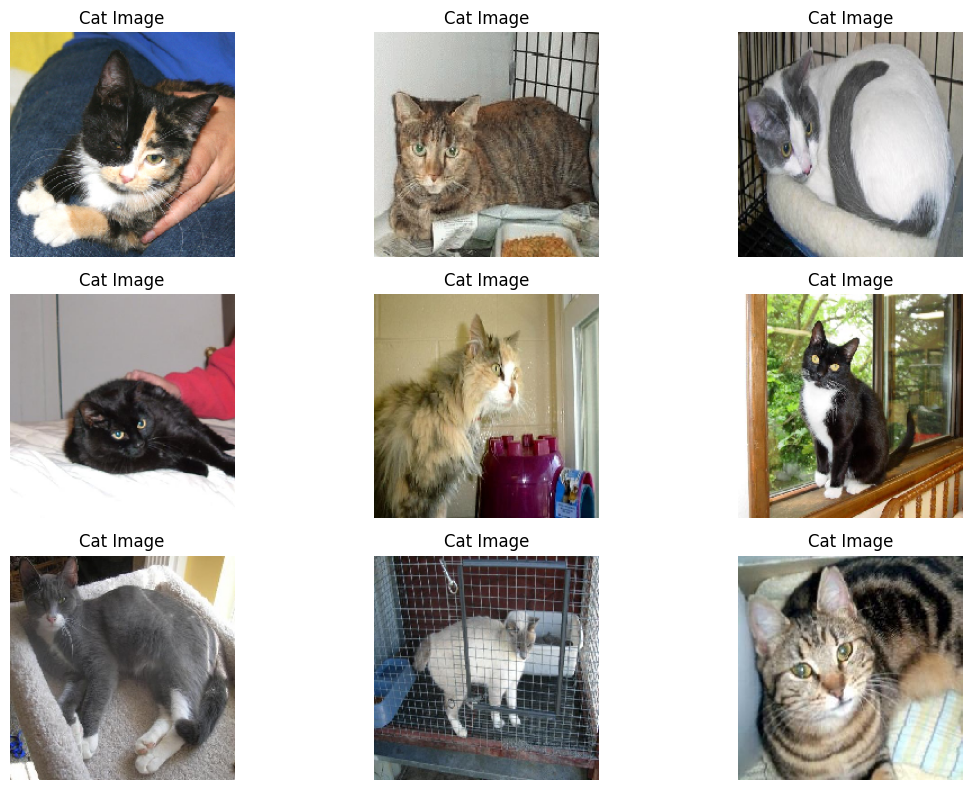

In [11]:
# Get a list of all cat image file names
cats_subfolder = os.path.join(data_dir, "Cat")

# Get a list of all Cat image file names
cats_image_files = os.listdir(cats_subfolder)

# Load the first nine cat images
cats_images = []
for i in range(min(9, len(cats_image_files))):  # Limit to available cat images
    img_path = os.path.join(cats_subfolder, cats_image_files[i])
    img = image.load_img(img_path, target_size=(200, 200)) 
    img_array = image.img_to_array(img)
    img_array /= 255.0
    cats_images.append(img_array)

# Create a single figure to display all cat images
plt.figure(figsize=(12, 8))

for i in range(len(cats_images)):
    plt.subplot(3, 3, i + 1)
    plt.imshow(cats_images[i])
    plt.title('Cat Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()

In [13]:
num_dog_images = len(os.listdir(cats_subfolder))

# Imprimir el resultado
print(f"La subcarpeta 'cat' contiene {num_dog_images} imágenes.")

La subcarpeta 'cat' contiene 12491 imágenes.


#######Con el código que sigue voy a unir las carpeta cat y dog, lo voy a renombrar (con prefijo), luego creo la carpeta de test y train (con cat y dog subfile).
Seguido paso los datos a cada carpeta que corresponda. 

In [5]:
import os
import random
import shutil

# Ruta de las carpetas de origen
carpeta_dog = '/workspaces/machine-learning-python-reyna/data/raw/dog_1'
carpeta_cat = '/workspaces/machine-learning-python-reyna/data/raw/cat_1'

# Ruta de las carpetas de destino
carpeta_train = '/workspaces/machine-learning-python-reyna/data/raw/train'
carpeta_test = '/workspaces/machine-learning-python-reyna/data/raw/test'

# Prefijos para las imágenes
prefijo_dog = 'dog_'
prefijo_cat = 'cat_'

# Función para renombrar las imágenes y moverlas a las carpetas correspondientes
def preparar_datos(origen, prefijo, destino_train, destino_test, fraccion_test=0.2):
    imagenes = os.listdir(origen)
    random.shuffle(imagenes)

    # Crear directorio de destino si no existe
    if not os.path.exists(destino_train):
        os.makedirs(destino_train)

    if not os.path.exists(destino_test):
        os.makedirs(destino_test)

    # Dividir las imágenes en train y test
    cantidad_train = 500
    cantidad_test = 200
    imagenes_train = imagenes[:cantidad_train]
    imagenes_test = imagenes[cantidad_train:cantidad_train+cantidad_test]

    # Mover imágenes a carpetas de train con el prefijo correspondiente
    for imagen in imagenes_train:
        nombre, extension = os.path.splitext(imagen)
        nuevo_nombre = prefijo + nombre + extension
        ruta_origen = os.path.join(origen, imagen)
        ruta_destino = os.path.join(destino_train, nuevo_nombre)
        shutil.copyfile(ruta_origen, ruta_destino)

    # Mover imágenes a carpeta de test sin prefijo
    for imagen in imagenes_test:
        ruta_origen = os.path.join(origen, imagen)
        ruta_destino = os.path.join(destino_test, imagen)
        shutil.copyfile(ruta_origen, ruta_destino)

# Preparar datos para la carpeta dog
preparar_datos(carpeta_dog, prefijo_dog, os.path.join(carpeta_train, 'dog'), carpeta_test)

# Preparar datos para la carpeta cat
preparar_datos(carpeta_cat, prefijo_cat, os.path.join(carpeta_train, 'cat'), carpeta_test)


Recordar: El generador de datos para pruebas (ImageDataGenerator) no debería utilizar flow_from_directory ya que las imágenes de prueba no están organizadas en subcarpetas con clases. En cambio, debes utilizar flow_from_directory solo para el conjunto de entrenamiento y luego utilizar flow_from_dataframe para el conjunto de prueba.

In [11]:
from keras.preprocessing.image import ImageDataGenerator
import os
import pandas as pd

# Define a few rules for DataGen
base_dir = "../data/raw"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")
image_size = (200, 200)

datagentrain = ImageDataGenerator()
datagentest = ImageDataGenerator()

# Train Data Generation
train_data = datagentrain.flow_from_directory(
    train_dir,
    target_size=image_size,
    classes=["dog", "cat"]
)

# Test Data Generation
# Assuming you have a DataFrame with filenames in the 'filename' column
test_df = pd.DataFrame({'filename': os.listdir(test_dir)})

test_data = datagentest.flow_from_dataframe(
    test_df,
    test_dir,
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=image_size,
    batch_size=32
)

Found 1000 images belonging to 2 classes.
Found 396 validated image filenames.


In [12]:
# Imprimir el tamaño de algunas imágenes del conjunto de entrenamiento
for batch in train_data:
    # batch[0] contiene las imágenes
    print("Tamaño de las imágenes en el lote de entrenamiento:", batch[0].shape)
    break  # Solo imprimimos el tamaño del primer lote para evitar un bucle infinito

# Imprimir el tamaño de algunas imágenes del conjunto de prueba
for batch in test_data:
    # batch[0] contiene las imágenes
    print("Tamaño de las imágenes en el lote de prueba:", batch[0].shape)
    break  # Solo imprimimos el tamaño del primer lote para evitar un bucle infinito

Tamaño de las imágenes en el lote de entrenamiento: (32, 200, 200, 3)
Tamaño de las imágenes en el lote de prueba: (200, 200, 3)


  La arquitectura de CNN utilizada para ganar la competencia de Kaggle ILSVR (Imagenet) en 2014. Se considera una de las arquitecturas de modelos de visión con mejores resultados hasta la fecha

In [13]:
##########Train The Model (arquitectura de CNN utilizada)
# Move the Data Through the Neural Network
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

###capas convolucionales y de agrupación
model = Sequential() # Sequential es una clase de Keras que se utiliza para crear modelos de forma secuencial, donde las capas se apilan una encima de la otra.
model.add(Conv2D(input_shape = (200,200,3), filters = 64, kernel_size = (3,3), padding = "same", activation = "relu")) # input_shape=(200, 200, 3) especifica las dimensiones de entrada de tus datos. En este caso, se asume que estás trabajando con imágenes de tamaño 200x200 píxeles con 3 canales de color (RGB).
model.add(Conv2D(filters = 64,kernel_size = (3,3),padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = "same", activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2),strides = (2,2)))

# Move the Data through the Dense Layers
model.add(Flatten()) # capa Flatten 
model.add(Dense(units=512, activation="relu")) ##capas conectadas
model.add(Dense(units=256, activation="relu")) ##capas conectadsas
model.add(Dense(units=2, activation="softmax")) #### Capa de salida


Explicacion de lo anterior: 

Capas convolucionales y de agrupación:

Convolucionales:Estas capas son el componente principal de las CNN y están diseñadas para aprender patrones y características espaciales en los datos de entrada. Utilizan filtros (kernels) que se deslizan sobre la imagen para extraer características como bordes, texturas o formas.

Las primeras catorce capas Conv2D y MaxPool2D forman las capas convolucionales y de agrupación. En este caso, tienes varias capas convolucionales seguidas de capas de agrupación.

Las capas Conv2D están configuradas para utilizar la función de activación ReLU (activation="relu") y un tamaño de kernel de (3,3). Estas capas están diseñadas para extraer características de las imágenes.
Función de activación (Activation Function): Después de cada capa convolucional, se aplica una función de activación como ReLU (Rectified Linear Unit) para introducir no linealidades en el modelo y permitir la captura de patrones más complejos.

Capas de agrupación (Pooling Layers): Estas capas reducen la dimensionalidad espacial de la representación y el número de parámetros en el modelo. La operación de agrupación, comúnmente conocida como "pooling", se realiza tomando el valor máximo o promedio en una región determinada.

Las capas MaxPool2D están configuradas para realizar la operación de agrupación máxima con un tamaño de pool de (2,2) y un stride de (2,2). Esto reduce la dimensionalidad espacial de la representación.

Capas totalmente conectadas:
Después de las capas convolucionales, tu modelo incluye tres capas Dense que forman las capas totalmente conectadas. Estas capas están diseñadas para combinar las características aprendidas por las capas convolucionales y realizar la clasificación final.
Las capas Dense utilizan la función de activación ReLU.

se utiliza una capa Flatten para convertir la salida de las capas convolucionales en un vector unidimensional. Esto es necesario porque las capas totalmente conectadas requieren una entrada unidimensional

Capa de salida:

La última capa Dense tiene una unidad igual a 2 (supongo que estás realizando una clasificación binaria) y utiliza la función de activación softmax, lo que indica que el modelo está diseñado para la clasificación y la salida se interpreta como probabilidades.


In [14]:
# Compile the Model using Adam 
from keras.optimizers import Adam

# Compile the Model before Training
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = Adam(learning_rate = 0.001), metrics = ["accuracy"])

In [15]:
# Train the Model 
model.fit(train_data, epochs=1)


32/32 [==============================] - 985s 31s/step - loss: 84.2463 - accuracy: 0.4960


In [16]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
# Obtener el número total de lotes disponibles en el generador de datos de entrenamiento
total_batches = train_data.n // train_data.batch_size

# Establecer steps_per_epoch como el número total de lotes
steps_per_epoch = total_batches

# ModelCheckpoint y EarlyStopping
checkpoint = ModelCheckpoint("../models/vgg16_1.h5", monitor="val_accuracy", verbose=1, save_best_only=True, save_weights_only=False, mode="auto")
early = EarlyStopping(monitor="val_accuracy", patience=3, verbose=1, mode="auto")

# Entrenar el modelo con el nuevo valor de steps_per_epoch
hist = model.fit(train_data, steps_per_epoch=steps_per_epoch, validation_data=test_data, validation_steps=10, epochs=2, callbacks=[checkpoint, early])

Epoch 1/2


31/31 [==============================] - ETA: 0s - loss: 0.6960 - accuracy: 0.4876 
Epoch 1: val_accuracy improved from -inf to 0.00000, saving model to ../models/vgg16_1.h5


/home/vscode/.local/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


31/31 [==============================] - 944s 30s/step - loss: 0.6960 - accuracy: 0.4876 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/2
31/31 [==============================] - ETA: 0s - loss: 0.6939 - accuracy: 0.4835 
Epoch 2: val_accuracy did not improve from 0.00000
31/31 [==============================] - 940s 30s/step - loss: 0.6939 - accuracy: 0.4835 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


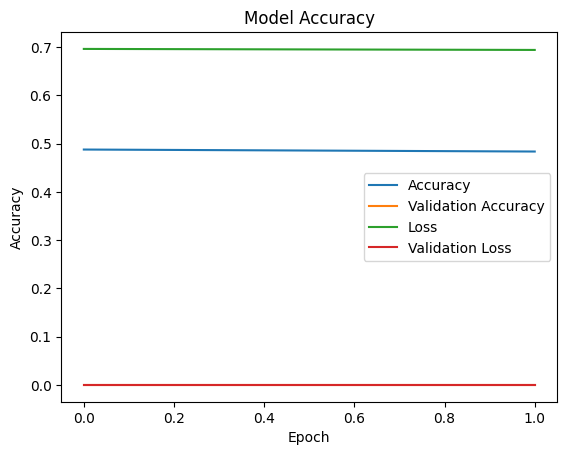

In [18]:
# Check the Accuracy of the Data

#Plot the Results
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])

# Configure the Plot Layout
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy", "Validation Accuracy", "Loss", "Validation Loss"])

# Plot
plt.show()

1/1 [==============================] - 0s 394ms/step
cat


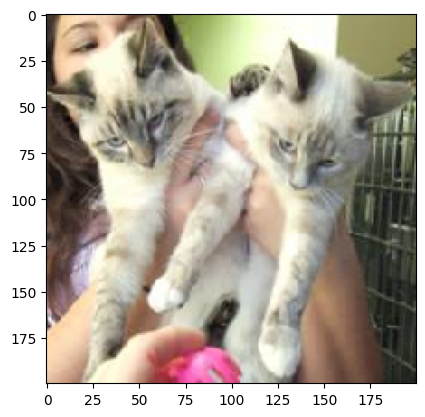

In [29]:
from keras.preprocessing import image
from keras.models import load_model

img = image.load_img("../data/raw/test/1151.jpg", target_size = (200, 200))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis = 0)
saved_model = load_model("../models/vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print("dog")